# Estimación del número $\pi$
## Método Monte Carlo
### Situación
Nos encontramos ante una superficie de *40 cm X 80 cm* en la que se sitúan una sección cuadrada de lado _a_ y una sección circular de radio _a_.

### Parámetros relevantes del experimento:
- Dimensiones de la superficie: _40cm X 80cm_.
- Tamaño de las figuras, determinado por _a_.
- Posición de cada punto sobre la superficie: _coordenadas x e y_.

In [2]:
# Dimensiones del tablero
table_width = 80
table_height = 40

# a - radio del círculo y lado del cuadrado
a = table_height / 2

# Determinamos la posicion de las figuras en el tablero

# Circulo centrado en el tercer cuarto de la anchura de la superficie
circle_centre = (3 * (table_width / 4), table_height / 2)

# Cuadrado centrado en el primer cuarto de la anchura de la superficie
square_centre = (table_width / 4, table_height / 2)

### Identificar las distribuciones de probabilidad de cada parámetro
El parámetro que se ve afectado por la aleatoriedad en este experimento es la posición en la que cae el punto sobre la superficie. Es decir, las _coordenadas x e y_.

Si tomamos las coordenadas como números de coma flotante, podemos interpretar que se tratan de **variables continuas**.

Puesto que, tanto para _x_ como para _y_ todos los valores dentro del rango posible son equiprobables, nos hayamos ante un caso de **distribución uniforme**.
- El rango que abarca la variable _x_ es un valor continuo en el intervalo de _0cm a 80cm_.
- El rango que abarca la variable _y_ es un valor continuo en el intervalo de _0cm a 40cm_.


### Ahora, debemos obtener muestras aleatorias de las distribuciones.
Es decir, debemos obtener una cantidad significante de puntos con coordenadas _(x, y)_.

In [3]:
import numpy as np

In [4]:
# Definimos la cantidad de muestras que queremos obtener
N_muestras = int(1e6)

# Definimos el generador de números pseudoaleatorios
rng = np.random.default_rng(23)

In [5]:
# Definimos la función que, dado un generador de números aleatorios, obtiene N coordenadas
def obtener_coordenadas(rng_seed, numero_muestras):
    x = rng_seed.uniform(0, table_width, size = numero_muestras)
    y = rng_seed.uniform(0, table_height, size = numero_muestras)

    return (x, y)

In [6]:
# Obtenemos un número N de coordenadas
coordenadas = obtener_coordenadas(rng, N_muestras)


### Ahora, realizaremos la simulación para cada una de las muestras.
Es decir, comprobaremos si cada una de las coordenadas está contenida en el cuadrado, en el círculo, o en ninguna de las dos figuras

In [7]:
# Definimos las coordenadas que se consideran dentro del cuadrado
def dentro_cuadrado(x, y, longitud_lado):

    x_cuadrado, y_cuadrado = square_centre
    x_limite_inferior_cuadrado = x_cuadrado - (longitud_lado / 2)
    x_limite_superior_cuadrado = x_cuadrado + (longitud_lado / 2)
    y_limite_inferior_cuadrado = y_cuadrado - (longitud_lado / 2)
    y_limite_superior_cuadrado = y_cuadrado + (longitud_lado / 2)

    return (x_limite_inferior_cuadrado < x < x_limite_superior_cuadrado) and (y_limite_inferior_cuadrado < y < y_limite_superior_cuadrado)

In [8]:
# Definimos las coordenadas que se consideran dentro del círculo
def dentro_circulo(x, y, radio):
    
    x_circulo, y_circulo = circle_centre
    distancia_a_coordenada = (x - x_circulo)**2 + (y - y_circulo)**2

    return (distancia_a_coordenada < radio**2)

In [23]:
def realizar_simulacion(coordenadas, N_muestras, magnitud_figuras):
    # Desglosamos las coordenadas
    x, y = coordenadas

    # Establecemos contadores para saber en que figura cae cada punto
    puntos_cuadrado = 0
    puntos_circulo  = 0

    # Recorremos el array y sumamos al contador correspondiente
    for i in range(N_muestras):
        if (dentro_circulo(x[i], y[i], magnitud_figuras)):
            puntos_circulo += 1
        if (dentro_cuadrado(x[i], y[i], magnitud_figuras)):
            puntos_cuadrado += 1

    # Obtenemos pi: la proporcion de puntos dentro del círculo con respecto a los puntos dentro del cuadrado
    if puntos_cuadrado >= 1:        
        resultado = puntos_circulo / puntos_cuadrado
        return resultado
    # Si no ha caído ningún punto en el cuadrado, no podemos realizar una estimación. Devolvemos cero
    else:
        return 0

### Repetir el proceso
De esta forma, tenemos definido el **experimento** a repetir. Ahora, debemos repetirlo un número significativo de veces para obtener resultados que podamos analizar.

In [24]:
def experimento(rng, N_muestras, magnitud_figuras):
    coordenadas = obtener_coordenadas(rng, N_muestras)
    return realizar_simulacion(coordenadas, N_muestras, magnitud_figuras)

In [14]:
experimento(rng, N_muestras, a)

3.1354551414272236

# 1) Analizar la distribución resultante
### Analizar los resultados
Ahora, debemos repetir el experimento un número sustancial de veces para obtener datos que podamos analizar

In [15]:
# Definimos el generador de números pseudoaleatorios
rng = np.random.default_rng(18)

In [16]:
# Número de muestras aleatorias a obtener en cada repetición
N_muestras = int(1e3)

# Número de veces a repetir el experimento
N_repeticiones = 1000

# Guardamos los datos resultado de cada uno de los experimentos
resultados = np.array([experimento(rng, N_muestras, a) for n in range(N_repeticiones)])

El primer análisis que podemos realizar, es calcular la media de los resultados obtenidos, ya que debería aproximarse más a $\pi$ que un resultado individual.

In [17]:
# Media de resultados
media = resultados.mean()
print(f"La media de los resultados es {media}")

La media de los resultados es 3.1678639325014046


Visualizamos los resultados

In [ ]:
import seaborn as sns

<Axes: ylabel='Density'>

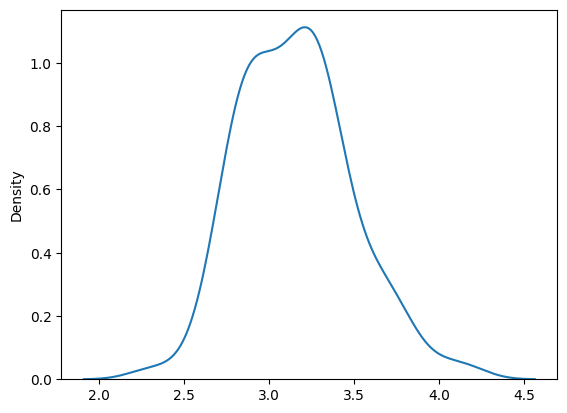

In [ ]:
sns.kdeplot(resultados)


**3.1565...** no es una muy buena aproximación de $\pi$. Sin cambiar ningún parámetro relevante del experimento, podemos mejorar esta aproximación de dos maneras:
1. Aumentando el número de muestras que obtenemos en cada repetición.


La media de los resultados es 3.1427845879001888


<Axes: ylabel='Density'>

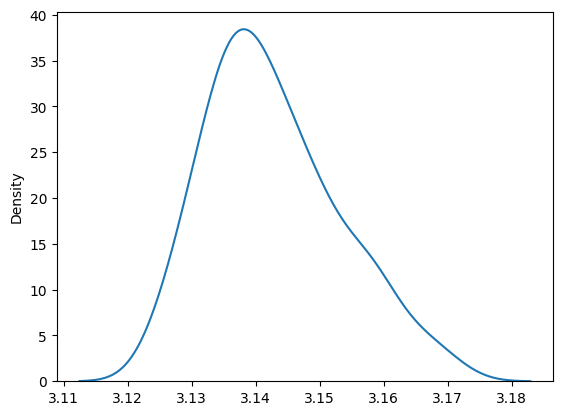

In [ ]:
# Aumentamos las muestras de 1.000 a 1.000.000
N_muestras_aumentadas = N_muestras * int(1e3)

# Guardamos los datos resultado de cada uno de los experimentos
resultados = np.array([experimento(rng, N_muestras_aumentadas, a) for n in range(N_repeticiones)])

# Media de resultados
media = resultados.mean()
print(f"La media de los resultados es {media}")

sns.kdeplot(resultados)


2. Aumentando el número de veces que repetimos el experimento. 

La media de los resultados es 3.166167625791679


<Axes: ylabel='Density'>

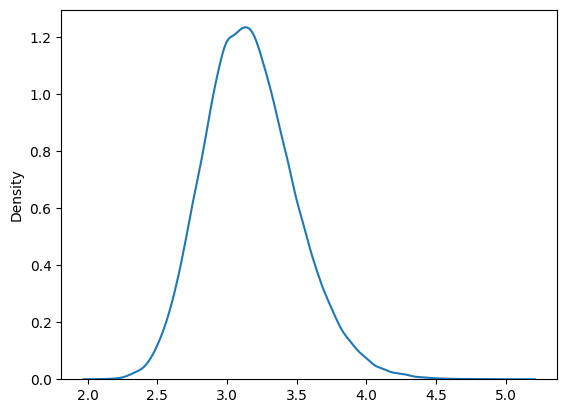

In [ ]:
# Aumentamos el número de repeticiones del experimento de 100 a 100.000
N_repeticiones_aumentadas = N_repeticiones * int(1e3)

# Guardamos los datos resultado de cada uno de los experimentos
resultados = np.array([experimento(rng, N_muestras, a) for n in range(N_repeticiones_aumentadas)])

# Media de resultados
media = resultados.mean()
print(f"La media de los resultados es {media}")

sns.kdeplot(resultados)

### Analizando las medias obtenidas.
Hemos probado a modificar dos pasos diferentes del método Monte Carlo para obtener resultados que se acerquen más a la esperanza (el número $\pi$):
1. Aumentar las muestras aleatorias
2. Repetir más veces el experimento

En ambos casos, el **número total de muestras simuladas es el mismo**:
- _Muestras simuladas = Nº de muestras * Repeticiones del experimento_
1. Muestras simuladas = 1.000.000 * 100 = 100.000.000
2. Muestras simuladas = 1.000 * 100.000 = 100.000.000

A pesar de ello, **los resultados que hemos obtenido son muy diferentes**:
1. Media = 3.1427845879001888
2. Media = 3.166661536908126


### ¿A qué se debe esto?
El experimento simula la distribución aleatoria de puntos sobre _toda la superficie_. El valor de $\pi$ se extrae de la _relación entre los puntos que caen dentro del área del círculo y los que caen dentro del área del cuadrado_.
- Área del círculo = $\pi * a^2$
- Área del cuadrado = $a^2$

De esta forma, **las únicas muestras que nos aportan información son aquellas que caen dentro de una de las dos figuras**. Para poder sacar conclusiones de por qué aumentar las muestras aleatorias es más eficiente que aumentar las repeticiones del experimento, debemos _estudiar el parámetro **a**_

# 2) Estudiar el efecto del parámetro fijo _a_

Es intuitivo que, a mayor tamaño de las figuras, mayor probabilidad que bajo el mismo número de muestras, más puntos caigan en una de las dos figuras y por tanto nuestra estimación de $\pi$ sea mejor.
Para poder demostrarlo matemáticamente, podemos apoyarnos en la estadística.

Los primeros experimentos los hemos realizado estableciendo _a_ como la mitad de la altura de la superficie. Esto se debe a que es el mayor valor que podemos establecer de radio del círculo y que se mantenga dentro de la superficie.

In [25]:
# a - radio del círculo y lado del cuadrado
a = table_height / 2

# Número de muestras aleatorias a obtener en cada repetición
N_muestras = int(1e3)

# Número de veces a repetir el experimento
N_repeticiones = 1000

# Guardamos los datos resultado de cada uno de los experimentos
resultados = np.array([experimento(rng, N_muestras, a) for n in range(N_repeticiones)])

# Media de los resultados
media = resultados.mean()
print(f"La media de los resultados es {media}")

La media de los resultados es 3.1581324059984484


In [29]:
# Creamos un array con diferentes tamaños para a, basandonos en el valor maximo que puede tomar
a_array = np.array([a, a/2, a/3, a/4, a/5, a/6, a/7, a/8, a/9, a/10])

medias = np.array([np.array([experimento(rng, N_muestras, a_value) for n in range(N_repeticiones)]).mean() for a_value in a_array])

# Calculamos la diferencia del valor obtenido con el valor esperado
diferencias = medias - np.pi

In [36]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Longitud de a')

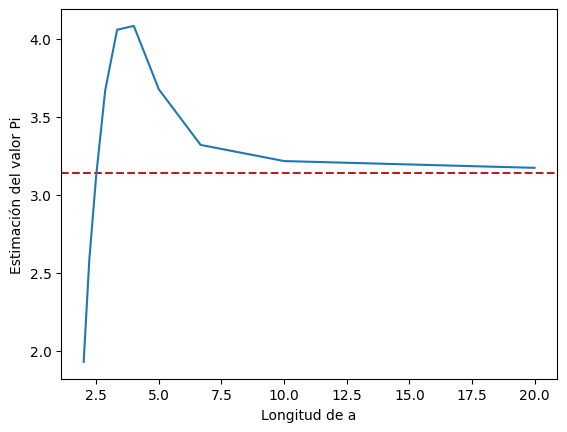

In [43]:
fig, ax = plt.subplots()
ax.axhline(y = np.pi, c="firebrick", linestyle="--")
ax.plot(a_array, medias)
ax.set_ylabel("Estimación del valor Pi")
ax.set_xlabel("Longitud de a")